#Imporing libreries and loading data


In [1]:
from sklearn.datasets import fetch_20newsgroups

In [2]:
print(fetch_20newsgroups)

<function fetch_20newsgroups at 0x7d2ace9b18a0>


In [3]:
newsgroups = fetch_20newsgroups(subset='all', remove=('headers', 'footers', 'quotes'))
documents = newsgroups.data

In [4]:
list(newsgroups.target_names)

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

In [5]:
newsgroups.filenames.shape

(18846,)

In [6]:
len(newsgroups.target_names)

20

#Preprocess the Text
##Clean the text:

- Tokenization
- Lowercasing
- Stopword removal
- Stemming or Lemmatization
  ##Feature Extraction:

- Convert documents into a vectorized format using BoW, TF-IDF, or embeddings


In [7]:
import string
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS

#convert in numarical form
from sklearn.feature_extraction.text import TfidfVectorizer

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [8]:
nltk.download('punkt', download_dir='/usr/local/share/nltk_data')


[nltk_data] Downloading package punkt to /usr/local/share/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [9]:
import nltk
nltk.data.path.append('/usr/local/share/nltk_data')

In [10]:
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [11]:
print(type(documents))
print(documents[:5])
documents = [doc for doc in documents if isinstance(doc, str)]

<class 'list'>
["\n\nI am sure some bashers of Pens fans are pretty confused about the lack\nof any kind of posts about the recent Pens massacre of the Devils. Actually,\nI am  bit puzzled too and a bit relieved. However, I am going to put an end\nto non-PIttsburghers' relief with a bit of praise for the Pens. Man, they\nare killing those Devils worse than I thought. Jagr just showed you why\nhe is much better than his regular season stats. He is also a lot\nfo fun to watch in the playoffs. Bowman should let JAgr have a lot of\nfun in the next couple of games since the Pens are going to beat the pulp out of Jersey anyway. I was very disappointed not to see the Islanders lose the final\nregular season game.          PENS RULE!!!\n\n", 'My brother is in the market for a high-performance video card that supports\nVESA local bus with 1-2MB RAM.  Does anyone have suggestions/ideas on:\n\n  - Diamond Stealth Pro Local Bus\n\n  - Orchid Farenheit 1280\n\n  - ATI Graphics Ultra Pro\n\n  - Any 

In [12]:
def processingData(text):
    tokens = word_tokenize(text.lower())
    tokens = [t for t in tokens if t.isalnum() and t not in ENGLISH_STOP_WORDS]
    return " ".join(tokens)

# # Process the documents
# sample_text = "Natural Language Processing is amazing!"
# print(word_tokenize(sample_text))

cleaned_document=[processingData(doc) for doc in documents]

In [13]:
print(cleaned_document[:10])

['sure bashers pens fans pretty confused lack kind posts recent pens massacre devils actually bit puzzled bit relieved going end relief bit praise pens man killing devils worse thought jagr just showed better regular season stats lot fo fun watch playoffs bowman let jagr lot fun couple games pens going beat pulp jersey disappointed islanders lose final regular season game pens rule', 'brother market video card supports vesa local bus ram does diamond stealth pro local bus orchid farenheit 1280 ati graphics ultra pro vlb card post email thank matt', 'finally said dream mediterranean new area greater years like holocaust numbers july usa sweden april cold changed calendar mentioned true let say true shall azeri women children going pay price raped killed tortured armenians hearded called geneva convention facist ohhh forgot armenians fight forgot killings rapings torture kurds turks time ohhhh swedish redcross workers lie say regional killer like person shoot policy l confused search tur

- Now conveting in to Numarical format


In [14]:
vectorize=TfidfVectorizer(max_features=1000)
x_tfidf=vectorize.fit_transform(cleaned_document)

In [15]:
print(x_tfidf[:10])

  (0, 869)	0.12209459383013296
  (0, 689)	0.14481881507878802
  (0, 491)	0.1802010748587255
  (0, 483)	0.14174480430631337
  (0, 733)	0.17353227652254158
  (0, 45)	0.12980982439779995
  (0, 122)	0.4157337017349417
  (0, 385)	0.24437869787755578
  (0, 303)	0.13904047871436087
  (0, 547)	0.1504495158684208
  (0, 988)	0.18098500823082114
  (0, 897)	0.13943079378875017
  (0, 477)	0.08664492524181115
  (0, 117)	0.12276345482622524
  (0, 740)	0.36891923502321405
  (0, 787)	0.35566164109500603
  (0, 533)	0.26154316137608385
  (0, 957)	0.17905784299894956
  (0, 508)	0.1257616195158815
  (0, 230)	0.15422495333567085
  (0, 368)	0.1591605697484595
  (0, 347)	0.17807273152706818
  (0, 367)	0.14665934133574818
  (0, 766)	0.18460621414312076
  (1, 552)	0.24284212947491776
  :	:
  (7, 474)	0.16580765268480993
  (8, 282)	0.14448435758113715
  (8, 692)	0.24698953264188706
  (8, 283)	0.2288823663183221
  (8, 788)	0.22679337253514092
  (8, 267)	0.33288363590198783
  (8, 474)	0.27401854952520127
  (8, 115

In [16]:
x_tfidf.shape

(18846, 1000)

#Traing the Model


In [18]:
from sklearn.cluster import DBSCAN
from sklearn.cluster import KMeans

In [20]:
kmeans=KMeans(n_clusters= 20, init= "k-means++")
kmean_labels=kmeans.fit_predict(x_tfidf)

In [21]:
print("Cluster Labels:", kmean_labels)  # -1 indicates noise
num_clusters = len(set(kmean_labels)) - (1 if -1 in kmean_labels else 0)
print(f"Number of clusters: {num_clusters}")

Cluster Labels: [16 10 17 ...  2  2 19]
Number of clusters: 20


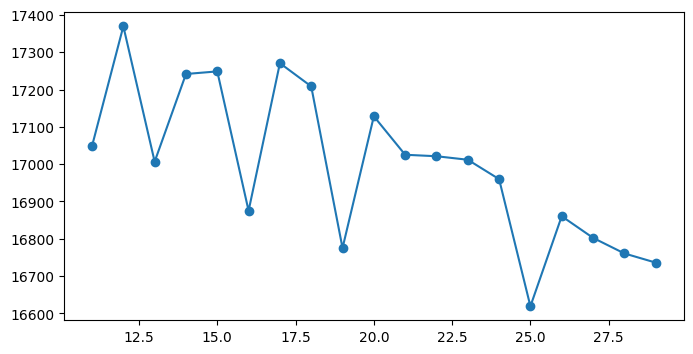

In [25]:
import matplotlib.pyplot as plt
import numpy as np

initia=[]
for k in range(11,30):
  kmean=KMeans(n_clusters=k)
  kmean.fit(x_tfidf)
  initia.append(kmean.inertia_)

plt.figure(figsize=(8,4))
plt.plot(range(11,30),initia,'-o')
plt.show()

In [ ]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, random_state=42, perplexity=30, n_iter=1000, metric='cosine',init='random')
X_2d = tsne.fit_transform(x_tfidf)



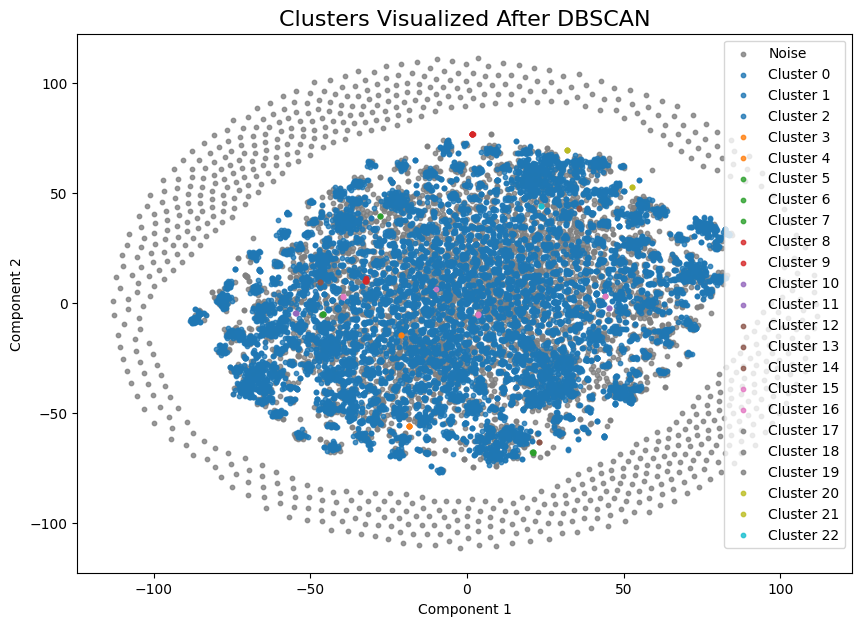

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Plot the clusters
plt.figure(figsize=(10, 7))
unique_labels = np.unique(labels)

# Assign a color to each cluster
for label in unique_labels:
    if label == -1:  # Noise points
        color = "gray"
        label_name = "Noise"
    else:
        color = plt.cm.tab10(label / (num_clusters + 1))  # Distinct color for each cluster
        label_name = f"Cluster {label}"

    plt.scatter(
        X_2d[labels == label, 0], X_2d[labels == label, 1],
        c=[color], label=label_name, alpha=0.8, s=10
    )

# Add title, labels, and legend
plt.title("Clusters Visualized After DBSCAN", fontsize=16)
plt.xlabel("Component 1")
plt.ylabel("Component 2")
plt.legend()
plt.show()
